In [4]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

#Importing the data
comp_fail = pd.read_csv("train_data.csv",index_col=0)

In [3]:
print(comp_fail.info())

,memory_GB,network_log10_MBps,local_IO_log10_MBps,NFS_IO_log10_MBps,failed
job_id,,,,,
jobID1634295,44.3904,-1.0262,0.8033,-3.0000,0
jobID2033452,31.5839,-1.4608,-0.6080,-2.9967,0
jobID2068800,154.4610,-0.5508,-0.3637,-3.0000,0
jobID78826,71.8570,3.5701,-0.1281,2.3040,0
jobID2935014,30.0370,3.3094,-0.9463,-3.0000,0
...,...,...,...,...,...
jobID3638409,62.2909,-1.3317,0.8725,-2.9175,0
jobID1716406,19.8377,3.1328,-0.2947,-3.0000,0
jobID360445,22.1773,3.5185,-0.4147,-3.0000,0


In [86]:
comp_fail.columns

Index(['memory_GB', 'network_log10_MBps', 'local_IO_log10_MBps',
       'NFS_IO_log10_MBps', 'failed'],
      dtype='object')

In [93]:
cat_cols = [col for col in comp_fail.columns if comp_fail[col].dtypes == 'O']

for col in comp_fail:
    print(comp_fail[col].value_counts(), "\n\n")

4.9981     5
5.0095     4
5.0535     4
9.8129     4
7.4236     4
          ..
25.8651    1
16.4559    1
29.0406    1
29.7149    1
21.4721    1
Name: memory_GB, Length: 18620, dtype: int64 


 2.8821    29
 3.2080    25
 3.2343    13
 2.8823    12
 3.2345    12
           ..
 3.1117     1
 1.9422     1
 0.5732     1
 1.1902     1
-1.4519     1
Name: network_log10_MBps, Length: 16402, dtype: int64 


-0.7196    6
-0.6231    6
-0.6070    6
 0.1870    6
-0.6857    6
          ..
 0.9775    1
 0.2174    1
-0.9128    1
-0.3553    1
-0.4670    1
Name: local_IO_log10_MBps, Length: 13774, dtype: int64 


-3.0000    10101
-2.9175       74
-2.9210       52
-2.9138       50
-2.9097       46
           ...  
 0.0284        1
 1.6651        1
-0.6852        1
 0.4415        1
-0.4670        1
Name: NFS_IO_log10_MBps, Length: 8114, dtype: int64 


0    18374
1     1626
Name: failed, dtype: int64 




In [96]:
comp_fail.isna().sum()

memory_GB              0
network_log10_MBps     0
local_IO_log10_MBps    0
NFS_IO_log10_MBps      0
failed                 0
dtype: int64

In [26]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = ["Working"],
            y = comp_fail[comp_fail["failed"]== 0]["failed"].value_counts().values,
            name='Working'
    )

trace1 = go.Bar(
            x = ["Failed"],
            y = comp_fail[comp_fail["failed"]== 1]["failed"].value_counts().values,
            name='Failed'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Failure Variable'
    ),
    title='Failure Distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [57]:
#Percentage of Failure
non_fail_count =int(comp_fail[comp_fail["failed"]== 0]["failed"].value_counts())
fail_count = int(comp_fail[comp_fail["failed"]== 1]["failed"].value_counts())
print((fail_count/(non_fail_count+fail_count)*100),"%")
print((non_fail_count/(non_fail_count+fail_count)*100),"%")

8.129999999999999 %
91.86999999999999 %


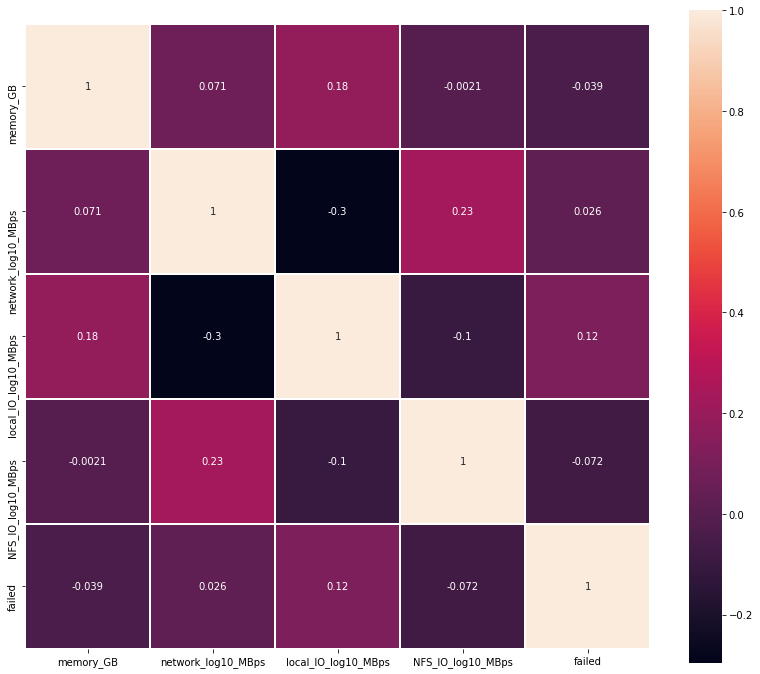

In [58]:
plt.figure(figsize=(14,12))
sns.heatmap(comp_fail.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [255]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score,cross_val_predict # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler

<h1>This is with not standardising the dataset<h1>

In [261]:
#Creating the X and y variables
X = comp_fail.drop('failed', 1).values
y = comp_fail["failed"].values
#X = StandardScaler().fit_transform(X)
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

LR: 0.500000 (0.000000)
LDA: 0.500000 (0.000000)
KNN: 0.705735 (0.021864)
CART: 0.703091 (0.021797)
NB: 0.500000 (0.000000)
RF: 0.687786 (0.020260)
RFB: 0.797995 (0.015892)
BBC: 0.786020 (0.023110)
SVM: 0.652310 (0.018634)
XGB: 0.673282 (0.020775)
RFBW: 0.686886 (0.020242)
LRBW: 0.653284 (0.017133)
RUS: 0.718879 (0.021600)
RUS: 0.718810 (0.024298)


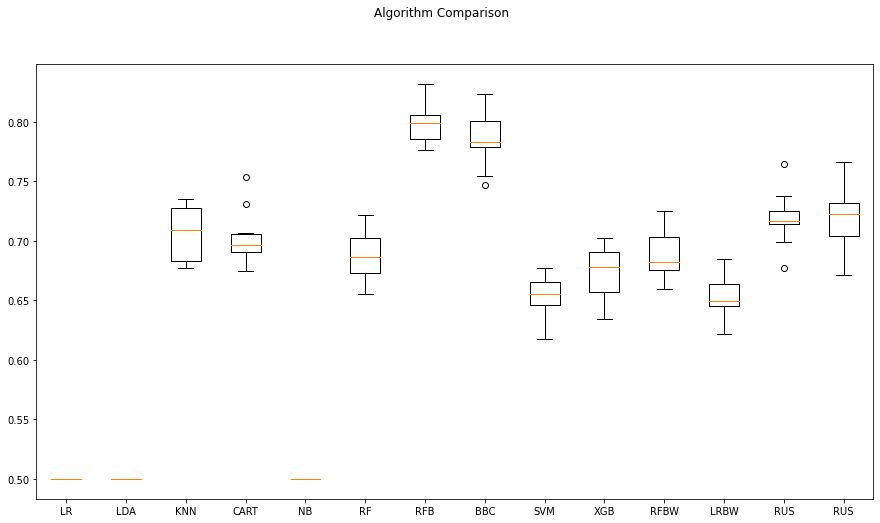

In [176]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring="balanced_accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.921200
LDA: 0.921200
KNN: 0.861799
CART: 0.691417
NB: 0.921200
RF: 0.878213
RFB: 0.623987
BBC: 0.635893
SVM: 0.908831
XGB: 0.900326
RFBW: 0.886182
LRBW: 0.544817
RUS: 0.583329
RUS: 0.577885


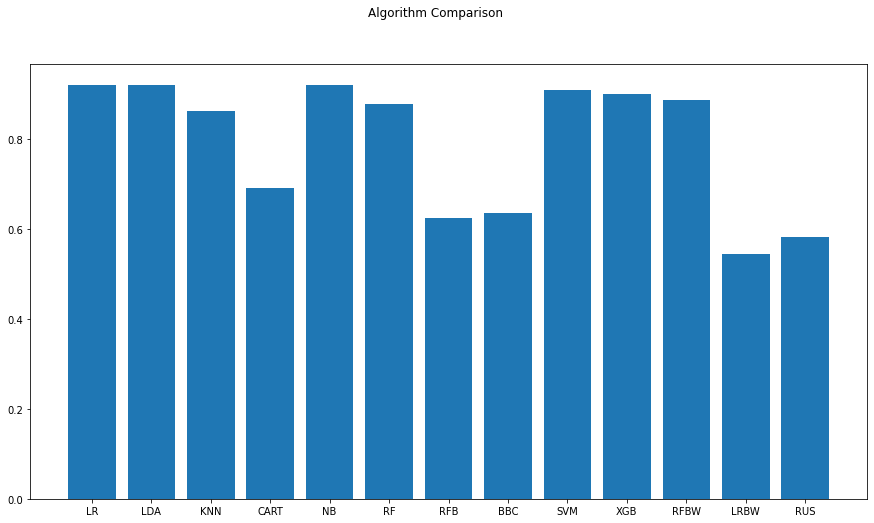

In [262]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)
        b_pred=balanced_accuracy_score(prediction, y_test)
        results.append(b_pred)
        names.append(name)
        msg = "%s: %f" % (name,b_pred)
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.bar(names,results)
plt.show()

<h1>This is with standardising the dataset<h1>

In [252]:
#Creating the X and y variables
X = comp_fail.drop('failed', 1).values
y = comp_fail["failed"].values
X = StandardScaler().fit_transform(X)
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


In [246]:
X_test

array([[ 0.14300121, -1.72126123, -0.97731455, -0.72977487],
       [-0.48700079,  1.00981329, -1.00482012, -0.72977487],
       [-0.41393217, -1.94989676, -0.83273027, -0.72977487],
       ...,
       [ 1.23105876, -0.13595355,  1.08934775,  1.62422655],
       [ 1.90336162,  0.70389647,  0.45023917, -0.72977487],
       [-0.17682969, -0.61044827,  0.17849561,  0.95691131]])

LR: 0.500000 (0.000000)
LDA: 0.500000 (0.000000)
KNN: 0.691979 (0.013106)
CART: 0.700442 (0.021086)
NB: 0.500000 (0.000000)
RF: 0.689329 (0.020272)
RFB: 0.793890 (0.015991)
BBC: 0.792284 (0.018740)
SVM: 0.499963 (0.000110)
XGB: 0.673282 (0.020775)
RFBW: 0.693284 (0.019751)
LRBW: 0.653284 (0.017039)
RUS: 0.706886 (0.032233)
RUS: 0.718149 (0.023447)


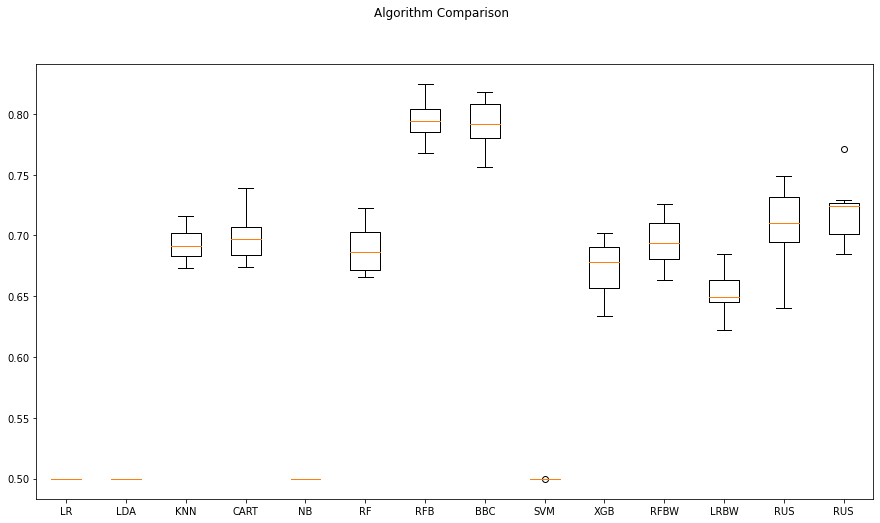

In [198]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring="balanced_accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.921200
LDA: 0.921200
KNN: 0.826298
CART: 0.686027
NB: 0.921200
RF: 0.873583
RFB: 0.630797
BBC: 0.640906
SVM: 0.921200
XGB: 0.899800
RFBW: 0.885592
LRBW: 0.544817
RUS: 0.575962
RUS: 0.577995


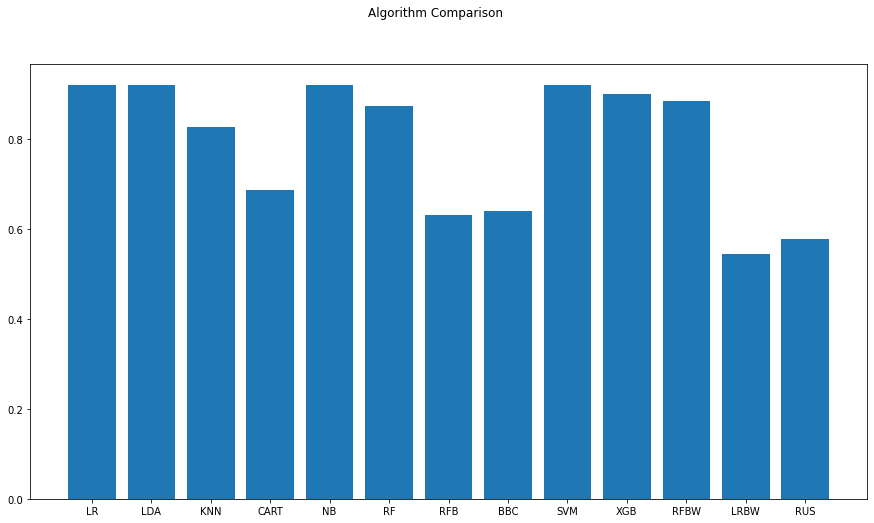

In [243]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)
        b_pred=balanced_accuracy_score(prediction, y_test)
        results.append(b_pred)
        names.append(name)
        msg = "%s: %f" % (name,b_pred)
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.bar(names,results)
plt.show()

<h1>PCA<h1>

In [264]:
X = comp_fail.drop('failed', 1).values
y = comp_fail["failed"].values
X = StandardScaler().fit_transform(X)
# Spliting X and y into train and test version
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [265]:
from sklearn.decomposition import PCA

pca_comp = PCA(n_components =3,random_state=seed)
prin_comp = pca_comp.fit_transform(X)
#prin_comp_df = pd.DataFrame(data = prin_comp,columns = ['Feature1', 'Feature2','Feature3'])

In [218]:
prin_comp

array([[ 2.05425511,  0.31813486, -0.20301524],
       [ 0.94459458, -0.73246714,  0.40692641],
       [ 1.30413633,  2.17758137,  1.54776246],
       ...,
       [-0.69245315, -0.02194841,  1.06047048],
       [-2.01531582,  0.07052293, -0.49845849],
       [-1.24820209, -0.59021599, -0.55464809]])

In [219]:
#prin_comp_df

,Feature1,Feature2,Feature3
0,2.054255,0.318135,-0.203015
1,0.944595,-0.732467,0.406926
2,1.304136,2.177581,1.547762
3,-1.676341,2.126822,-0.990496
4,-1.045299,-0.152905,1.398989
...,...,...,...
19995,2.269149,0.701558,-0.167317
19996,-0.461257,-0.075528,0.905162
19997,-0.692453,-0.021948,1.060470
19998,-2.015316,0.070523,-0.498458


In [220]:
#prin_comp_df.columns

Index(['Feature1', 'Feature2', 'Feature3'], dtype='object')

In [266]:
#Creating the X and y variables
#X = comp_fail.drop('failed', 1).values
#y = comp_fail["failed"].values
#X = StandardScaler().fit_transform(X)
# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(prin_comp, y, test_size = 0.25, random_state=42)

In [263]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        kfold = KFold(n_splits=10,random_state=seed,shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold,scoring="balanced_accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.500000 (0.000000)
LDA: 0.500000 (0.000000)
KNN: 0.705735 (0.021864)
CART: 0.704660 (0.023300)
NB: 0.500000 (0.000000)


KeyboardInterrupt: 

In [231]:
model = BalancedRandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
prediction

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

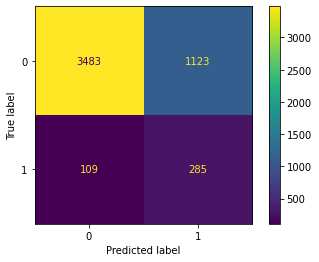

In [229]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)

In [232]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(prediction, y_test)

0.5894470974959465

LR: 0.921200
LDA: 0.921200
KNN: 0.820094
CART: 0.663383
NB: 0.921200
RF: 0.879207
RFB: 0.589293
BBC: 0.594022
SVM: 0.921200
XGB: 0.840825
RFBW: 0.875679
LRBW: 0.515233
RUS: 0.540905
RUS: 0.541023


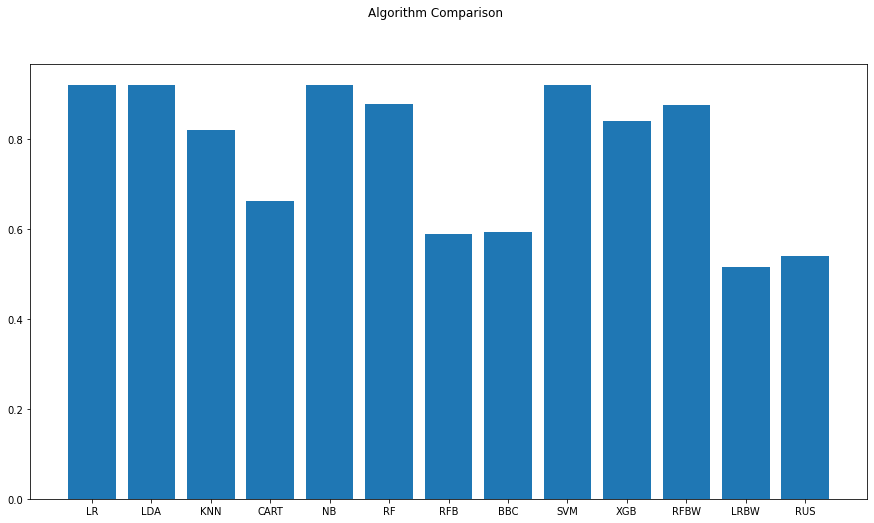

In [240]:
seed = 666
# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LRS', lr_clf))
#models.append(('LRS', rf_clf))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('RFB', BalancedRandomForestClassifier()))
models.append(('BBC', BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier())))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('RFBW', RandomForestClassifier(class_weight="balanced")))
models.append(('LRBW', LogisticRegression(class_weight="balanced")))
models.append(('RUS', RUSBoostClassifier()))
models.append(('RUS', EasyEnsembleClassifier()))
#models.append(('LDABW', LinearDiscriminantAnalysis(class_weight="balanced")))
#models.append(('NBBW', GaussianNB(class_weight="balanced")))
# evaluate each model in turn
results = []
names = []
scoring = 'balanced_accuracy'

for name, model in models:
        model.fit(X_train,y_train)
        prediction=model.predict(X_test)
        b_pred=balanced_accuracy_score(prediction, y_test)
        results.append(b_pred)
        names.append(name)
        msg = "%s: %f" % (name,b_pred)
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.bar(names,results)
plt.show()

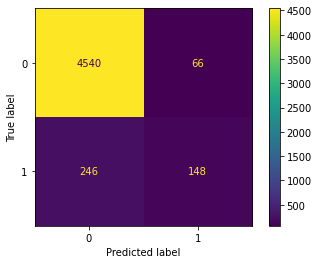

In [237]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
plot_confusion_matrix(model, X_test, y_test)